Nama: Wilson
NPM: 6182001039

# Interpolasi (2)

Untuk mengerjakan modul ini, pastikan Anda sudah memahami library Numpy.

Pada modul ini, Anda diminta untuk membuat interpolasi dengan metode cubic spline. Untuk dapat membuat cubic spline, Anda perlu membuat fungsi untuk mencari solusi dari sebuah SPL terlebih dahulu. Untuk mencari solusi dari SPL, gunakanlah metode eliminasi Gauss dan backward substitution. Anda akan diminta untuk membuat 3 fungsi:
1. EG(A,B): fungsi untuk melakukan eliminasi Gauss. Fungsi ini mengembalikan matriks A dan B yang sudah di-OBE
2. back_sub(A,B): melakukan backward substitution untuk mendapatkan vektor x yang merupakan solusi dari SPL Ax=B
3. solve_SPL(A,B): fungsi pembungkus untuk mencari solusi dari SPL. Pada fungsi ini, panggilah fungsi EG dan backward_substitution. Fungsi ini mengembalikan vektor x yang merupakan solusi dari SPL Ax=b

In [ ]:
import numpy as np
def EG(A, B):
   
    N = A.shape[0]

    for i in range(1, N):
        for j in range (i+1, N):
            temp = A[j, i]/A[i, i]
            A[j, :] = A[j, :] - temp*A[i, :]
            B[j] = B[j] - temp*B[i]
    
    return A, B

In [8]:
def back_sub(A,B):

    A, B = EG(A, B)
    N = A.shape[0]
    x = np.zeros(N, float)
    x[N] = B[N] / A[N, N]
    for i in range(N, 0, 0):
        x[i] = B[i]
        for j in range(i + 1, N-1):
            x[i] = x[i] - A[i][j] * x[j]
        x[i] = x[i]/A[i][i]
    
    return x

In [1]:
def solve(A,B):
     result = back_sub(A, B)
     print(result)

Setelah membuat fungsi untuk mencari solusi dari SPL, buatlah fungsi untuk melakukan interpolasi dengan metode natural cubic spline. Fungsi ini akan menerima parameter x dan y yang merupakan vektor yang menyatakan pasangan titik yang diketahui. Fungsi ini juga menerima parameter X. X adalah sebuah nilai atau vektor yang akan diinterpolasi. Fungsi ini mengembalikan sebuah vektor Y. Vektor Y adalah vektor yang berisi hasil interpolasi dari X.

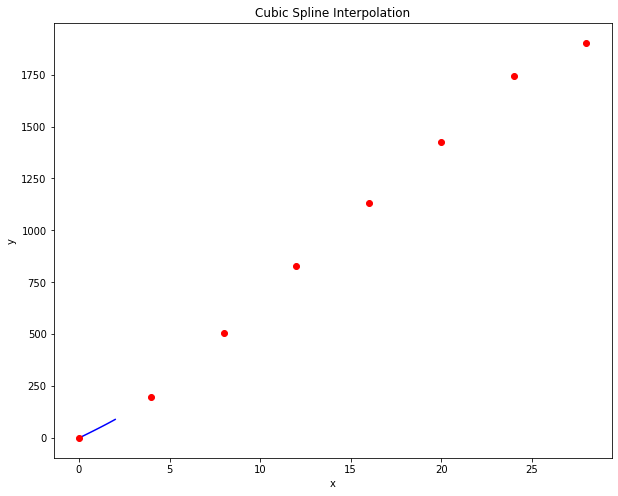

Untuk menguji hasil dari cubic spline yang sudah Anda buat, cobalah sintaks berikut ini:

In [4]:
import math
import matplotlib.pyplot as plt
x = np.array([0,1,2,3])
y = np.array([1, math.e, (math.e*math.e), (math.e**3)])
X = np.linspace(0,3,100)
Y = my_cubic_spline(x,y,X)
print(Y)
plt.figure(figsize = (10,8))
plt.plot(x,y, "ro", X, Y, "b")

NameError: name 'np' is not defined

Sebelumnya Anda sudah membuat fungsi untuk melakukan natural cubic spline. Buatlah juga untuk clamped cubic spline. Fungsi untuk clamped cubic spline sebenarnya sangat mirip dengan natural cubic spline. Perbedaannya adalah fungsi ini memiliki sebuah tambahan parameter yaitu vektor D. Vektor D adalah vektor yang berisi turunan fungsi pada titik awal dan titik akhir.

In [3]:
def my_D_cubic_spline(x,y,X,D):
    x,y, X, D = my_cubic_spline(x, y, X)
    f=my_D_cubic_spline(x,y,bc_type=((1,D),(1,D)))
    y_new=f(X)

    return y_new



Untuk menguji fungsi my_D_cubic_spline, jalankan sintaks berikut ini:

In [13]:
x = np.array([0,1,2,3])
y = np.array([1, math.e, (math.e*math.e), (math.e**3)])
X = np.linspace(0,3,100)
D = np.array([1, (math.e**3)])
Y = my_cubic_spline(x,y,X,D)
print(Y)
plt.figure(figsize = (10,8))
plt.plot(x,y, "ro", X, Y, "b")

NameError: name 'my_cubic_spline' is not defined